# Online Shopper's Intention 




<img src="https://i.imgur.com/NptuFGc.png" width=500 align="center">

# Contents
1. [Project Objectives](#1.-Project-Objectives) <br>
2. [What is the Online Shopper's Intention dataset about?](#2.-What-is-the-Online-Shopper's-Intention-dataset-about?)<br>
3. [Read This First](#3.-Read-This-First) <br>
4. [Methodology](#4.-Methodology) <br>
a. [Explanation of attributes](#a.-Explanation-of-attributes) <br> 
b. [Data Cleaning](#b.-Data-Cleaning) <br>
c. [Feature Selection](#c.-Feature-Selection) <br>
d. [K-means clustering](#d.-K\-means-clustering) <br>
e. [Additional Analysis](#e.-Additional-Analysis) <br>
5. [Key Takeaways](#5.-Key-Takeaways) <br> 
6. [Attribute Information](#6.-Attribute-Information) 

# 1. Project Objectives

The purpose of this project is to use clustering to identify segments of customers and carry out additional analysis whenever needed.

# 2. What is the Online Shopper's Intention dataset about?
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

<b>Link to dataset:</b> https://www.kaggle.com/roshansharma/online-shoppers-intention

# 3. Read This First 

It can be quite hard to read code sometimes and to aid you in understanding my code and my process of thinking, <br> 
I have included my <b>explanation and thought process in <font color=green> green </font></b> and <b>weaved my insights and results as # comments or in <font color=blue> blue. </font></b> 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')

In [2]:
shopper_df = pd.read_csv('online_shoppers_intention.csv')
shopper_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<font color=green>Below we carry out an important and necessary step to change the boolean variable ``Revenue`` to its numerical form, it can be done by multiplying by 1 to the column.

In [3]:
shopper_df['Revenue'] = shopper_df['Revenue'] * 1

# 4. Methodology

## a. Explanation of attributes

3 page types and the duration spent on each page
- Administrative 
- Administative_Duration 
<br>

- Informational 
- Informational_Duration
<br> 
<br>
- ProductRelated 
- ProductRelated_Duration



<b>Metric Attributes</b>
- BounceRates (enter and leave without interaction)
- ExitRates (% that were last in the session) 
- PageValues (average value for a web page that user visited before completing transaction) 

In [4]:
minmax = pd.DataFrame(shopper_df.iloc[:, list(range(10))].min())
minmax['Max'] = shopper_df.iloc[:, list(range(10))].max()
minmax.columns = ['Min', 'Max']
minmax

,Min,Max
Administrative,0.0,27.000000
Administrative_Duration,-1.0,3398.750000
Informational,0.0,24.000000
Informational_Duration,-1.0,2549.375000
ProductRelated,0.0,705.000000
ProductRelated_Duration,-1.0,63973.522230
BounceRates,0.0,0.200000
ExitRates,0.0,0.200000
PageValues,0.0,361.763742
SpecialDay,0.0,1.000000


<font color=green>Above shows the maximum and minimum values of the numerical variables in the dataset. From what we can observe, there are a few columns with -1 that needs to be replaced or removed.

<b>Time of Visits</b>
- <b>SpecialDay</b> (measures the closeness of the date to a specific holiday/celebration from 0 to 1)
- <b>Month</b> (Which month?)
- <b>Weekend</b> (Does it fall on a weekend?) 

<b>Demographics</b>
- <b>OperatingSystems</b> (what OS does it run on?)
- <b>Browser</b> (what browser does it use?)
- <b>Region</b> (which region does the user come from?)
- <b>TrafficType</b> (direct, referring, search engine? Where was the user linked from?)
- <b>VisitorType</b> (Returning or New Visitor?)

<b>Results</b> 
- <b>Revenue</b> (did it make money?) 

## b. Data Cleaning

<font color=green>Checking the shape of the dataset

In [5]:
shopper_df.shape

(12330, 18)

<font color=green>Over here, we replace all the -1 values we saw previously with NaN and drop the rows that have NaN and display the shape of the transformed dataset.

In [6]:
shopper_df['Administrative'] = shopper_df['Administrative'].replace(-1, float('nan'))
shopper_df['Administrative_Duration'] = shopper_df['Administrative_Duration'].replace(-1, np.nan)
shopper_df['Informational'] = shopper_df['Informational'].replace(-1, np.nan)
shopper_df['Informational_Duration'] = shopper_df['Informational_Duration'].replace(-1, np.nan)
shopper_df['ProductRelated'] = shopper_df['ProductRelated'].replace(-1, np.nan)
shopper_df['ProductRelated_Duration'] = shopper_df['ProductRelated_Duration'].replace(-1, np.nan)
shopper_df = shopper_df.dropna(axis=0, how='any')
shopper_df.shape

(12283, 18)

## c. Feature Selection

<font color=green>Which feature contributes the most to our target variable - Revenue? In order to find out, we first isolate the numerical variables into a dataframe called ``numeric_df``

In [7]:
numeric_df = shopper_df.iloc[:, list(range(10))]
numeric_df['Revenue'] = shopper_df['Revenue']
numeric_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,0


<font color=green>Correlation states how the features are related to each other or the target variable.<br>
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)<br>
<b>Plotting a correlation matrix with heatmap makes it easy to identify which features are most related to the target variable. </b>

In [8]:
numeric_df_corr = numeric_df.corr()
numeric_df_corr
highlight_table = numeric_df_corr.round(2).style.background_gradient(cmap='coolwarm')
highlight_table

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
Administrative,1,0.6,0.38,0.26,0.43,0.37,-0.22,-0.31,0.1,-0.1,0.14
Administrative_Duration,0.6,1,0.3,0.24,0.29,0.35,-0.14,-0.2,0.07,-0.07,0.09
Informational,0.38,0.3,1,0.62,0.37,0.39,-0.11,-0.16,0.05,-0.05,0.09
Informational_Duration,0.26,0.24,0.62,1,0.28,0.35,-0.07,-0.1,0.03,-0.03,0.07
ProductRelated,0.43,0.29,0.37,0.28,1,0.86,-0.2,-0.29,0.06,-0.02,0.16
ProductRelated_Duration,0.37,0.35,0.39,0.35,0.86,1,-0.18,-0.25,0.05,-0.04,0.15
BounceRates,-0.22,-0.14,-0.11,-0.07,-0.2,-0.18,1,0.91,-0.12,0.07,-0.15
ExitRates,-0.31,-0.2,-0.16,-0.1,-0.29,-0.25,0.91,1,-0.17,0.1,-0.21
PageValues,0.1,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,1,-0.06,0.49
SpecialDay,-0.1,-0.07,-0.05,-0.03,-0.02,-0.04,0.07,0.1,-0.06,1,-0.08


<font color=blue> <b>Here we can infer that </b>``ExitRates`` <b>has strong positive correlation with</b> ``BounceRates`` <b>at 0.91.</b><br>
Unsurprisingly, the 3 page types and their duration have positive strong correlation. <br>
As expected, page value is highly correlated with revenue output. <br> 

<font color=green>Another method of feature selection is using <b>SelectKBest</b> from the scikit learn library. It selects the features according to the k best scores. The feature with the <b>highest score ranks as the most significant feature.</b>  

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = numeric_df
X = numeric_df.iloc[:, list(range(10))]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs          Score
5  ProductRelated_Duration  863188.150020
8               PageValues  174213.640595
1  Administrative_Duration   40965.950567
3   Informational_Duration   34563.376655
4           ProductRelated   18992.927866
0           Administrative    1112.355860
2            Informational     352.539153
9               SpecialDay      54.037901
6              BounceRates      28.675637
7                ExitRates      28.178861


<font color=blue> The above shows that the <b>length of a session is key to generating revenue</b>, seeing how the 3 page durations are highly ranked, with ``ProductRelated_Duration`` ranked at the top. 

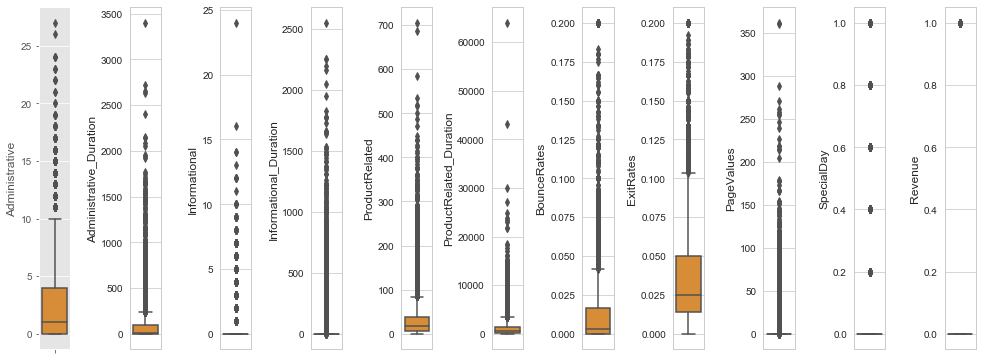

In [10]:
l = numeric_df.columns.values
number_of_columns=11
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(1.25*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(numeric_df[l[i]],color='#f28e1c',orient='v')
    plt.tight_layout()

<font color=blue>All columns show outliers

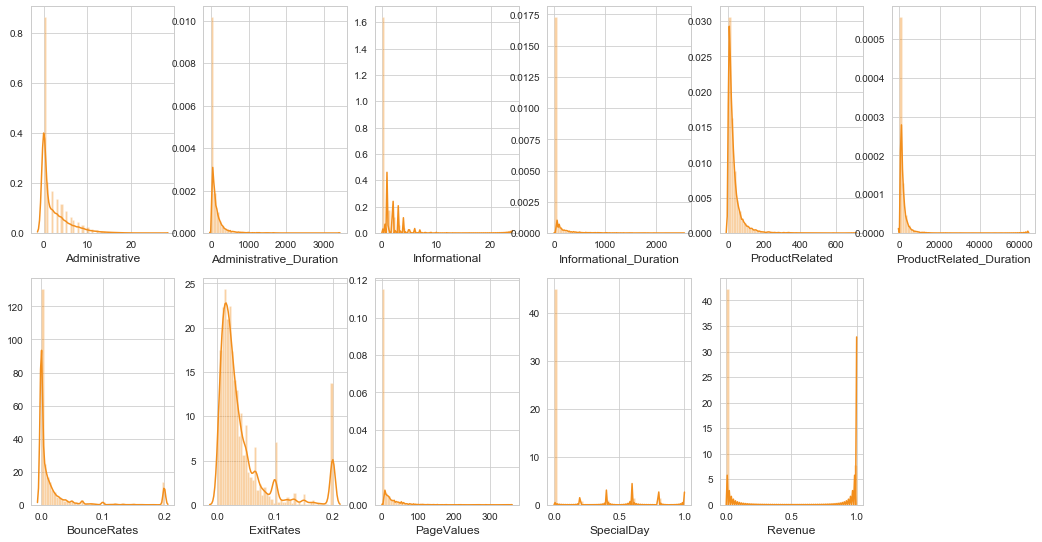

In [11]:
number_of_columns=6
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(3*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(numeric_df[l[i]],kde=True, color='#f28e1c') 

<font color=blue>Most columns appear to be right skewed.

## d. K-means clustering

<font color=green>From the results that we gathered from feature selection, there is evidence to show that how long a user stays on a page is a significant factor is determining whether he/she decides to purchase an item. To understand further on which products/items are the ones that stand out from the rest, we <b>dive in deeper to the product page category</b>. 

In [11]:
numeric_df.drop(columns = "BounceRates", inplace=True)
numeric_df.drop(columns = "ExitRates", inplace=True)

<font color=green>To analyse the product page category, we filter for the columns where the Administrative and Informational category are not included (meaning the values for them are 0) and store them in ``product_df``

In [12]:
filter_admin = numeric_df['Administrative'] == 0
filter_info = numeric_df['Informational'] == 0
filter_pdt = numeric_df['ProductRelated'] != 0
product_df = numeric_df[filter_admin & filter_info & filter_pdt]

<font color=green>Normalization of values takes place here to prepare the dataframe ``product_normal_df`` to carry out k-means clustering.

In [13]:
product_normal_df = product_df[['ProductRelated','ProductRelated_Duration','Revenue']]
product_normal_df = (product_normal_df - product_normal_df.min()) / (product_normal_df.max() - product_normal_df.min())
product_normal_df.columns = ['NProductRelated', 'NProductRelated_Duration', 'NRevenue']
product_normal_df.head()

,NProductRelated,NProductRelated_Duration,NRevenue
0,0.000000,0.000000,0.0
1,0.003891,0.005065,0.0
3,0.003891,0.000211,0.0
4,0.035019,0.049665,0.0
5,0.070039,0.012206,0.0


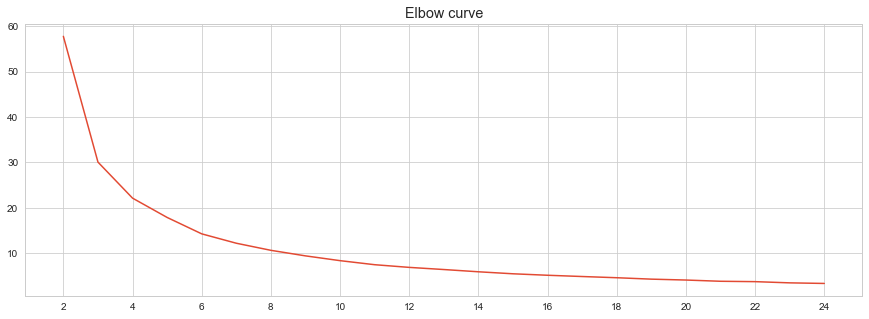

In [14]:
X = product_normal_df # <<< Numerical DataFrame here
distorsions = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 25), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks(np.arange(2,25,2))
plt.show()

<font color=green>The elbow curve looks at the <b>percentage of variance</b> explained as a <b>function of the number of clusters</b>. After some experimentation, I decided that the ideal cluster no. is 6. k = 6 is also when the curve starts to plateau.

In [15]:
k = 6
# Initialise Number Of Clusters
model = KMeans(n_clusters=k,  
               random_state=42) # default state of randomness

# DataFrame of the variables
pdt_kmeans = model.fit(product_normal_df) 
print(pdt_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


<font color=green> Great! Now that we created the dataframe of the variables, we use ``.labels_`` to add the cluster no. to each row. 

In [16]:
product_normal_df['Cluster'] = pdt_kmeans.labels_
product_normal_df.sort_values(by = 'Cluster', ascending=True).tail()

,NProductRelated,NProductRelated_Duration,NRevenue,Cluster
11591,0.859922,0.638622,0.0,5
3809,0.373541,0.594840,0.0,5
8704,0.264591,0.458544,0.0,5
3862,0.544747,0.228461,0.0,5
8719,0.392996,0.356877,0.0,5


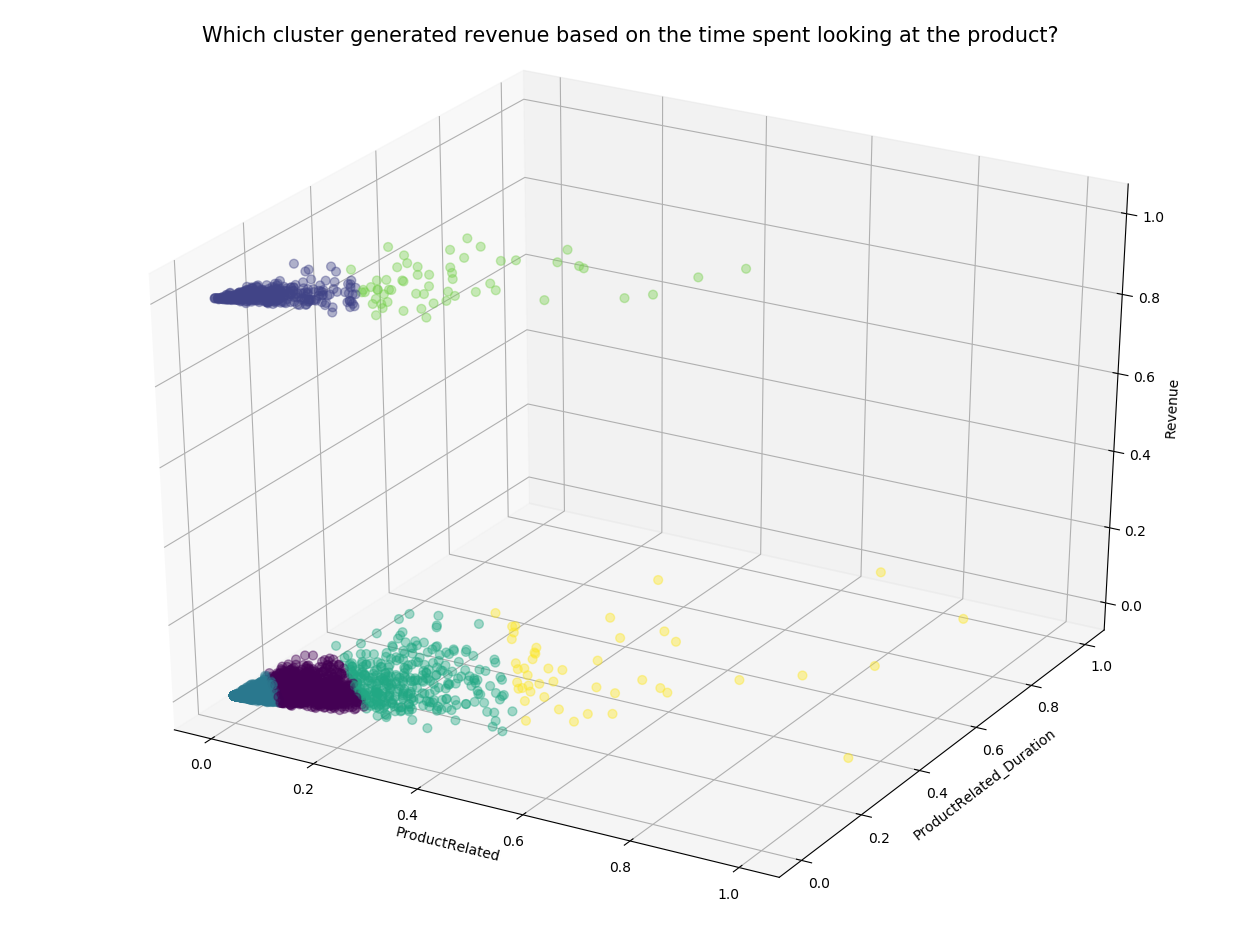

In [17]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('default')
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
x = np.array(product_normal_df['NProductRelated'])
y = np.array(product_normal_df['NProductRelated_Duration'])
z = np.array(product_normal_df['NRevenue'])

ax.scatter(x,y,z, marker="o", c=product_normal_df["Cluster"], s=40, alpha = 0.4)

ax.set_xlabel('ProductRelated', fontsize = 10)
ax.set_ylabel('ProductRelated_Duration', fontsize = 10)
ax.set_zlabel('Revenue', fontsize = 10)

plt.title('Which cluster generated revenue based on the time spent looking at the product?', loc='center',pad=30, fontsize=15)
plt.show()

<font color=blue>Above is the visualization of the individual clusters and how they are positioned on the graph. <b>Using clustering, we can identify segments of customers to target the potential user base</b>. <br> From what we can observe, the clusters are divided neatly into 2, the top cluster with value of 1 for revenue (meaning it earned revenue) and the bottom cluster. 

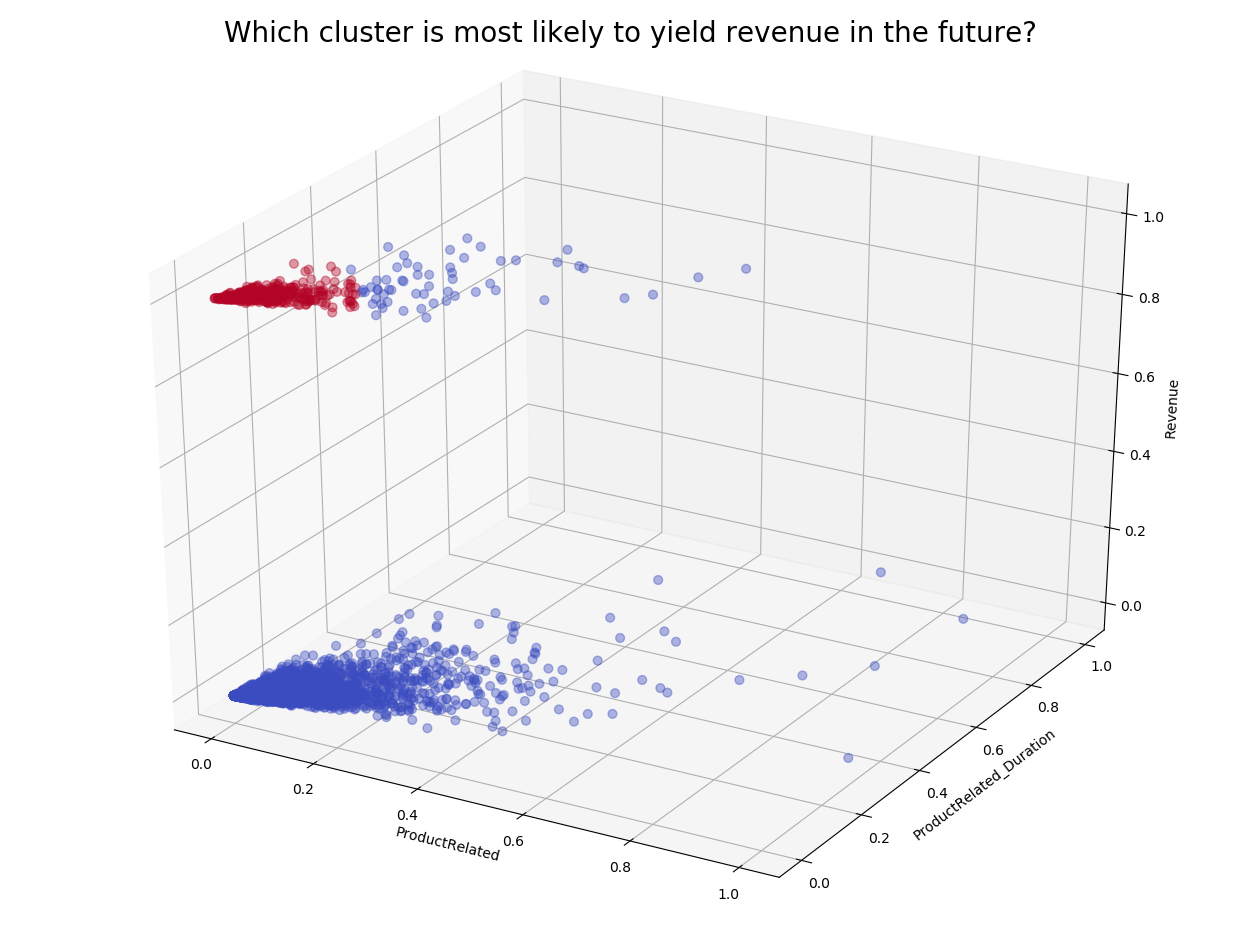

In [18]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
x = np.array(product_normal_df['NProductRelated'])
y = np.array(product_normal_df['NProductRelated_Duration'])
z = np.array(product_normal_df['NRevenue'])

ax.scatter(x,y,z, marker="o", c=product_normal_df["Cluster"] == 1, s=40, cmap="coolwarm", alpha = 0.4)

ax.set_xlabel('ProductRelated', fontsize = 10)
ax.set_ylabel('ProductRelated_Duration', fontsize = 10)
ax.set_zlabel('Revenue', fontsize = 10)

plt.title('Which cluster is most likely to yield revenue in the future?', loc='center',pad=30, fontsize=20)
plt.show()

<font color=blue> The cluster that is most likely to yield revenue would be the top cluster (Cluster 1) that has a low no. of page views and low duration. Why? It makes sense that users who are satisfied with the product would not spent time hesitating whether to buy the product.  

<font color=green>To understand further why these products are doing better than the rest, we bring in their categorical variables using the ``.concat`` function. 

In [19]:
original_df = pd.concat([product_normal_df, shopper_df], axis=1).reindex(product_normal_df.index)
original_df.head()

,NProductRelated,NProductRelated_Duration,NRevenue,Cluster,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0.003891,0.005065,0.0,2.0,0.0,0.0,0.0,0.0,2.0,64.000000,...,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
3,0.003891,0.000211,0.0,2.0,0.0,0.0,0.0,0.0,2.0,2.666667,...,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0.035019,0.049665,0.0,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,...,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0
5,0.070039,0.012206,0.0,2.0,0.0,0.0,0.0,0.0,19.0,154.216667,...,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,0


<font color=green>Now that we have all the variables we need to further analyse the best products on the site, we should also delete the columns that are unneccessary. 

In [20]:
Cluster_1 = original_df['Cluster'] == 1

cluster_1_original_df = original_df[Cluster_1]
cluster_1_original_df
cluster_1_original_df.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                           'ProductRelated', 'ProductRelated_Duration', 'NProductRelated', 'NProductRelated_Duration',
                           'NRevenue', 'Revenue'], axis = 1, inplace=True) 
cluster_1_original_df.shape
# Reduced the df to 12 columns

(369, 12)

In [21]:
cluster_1_original_df.groupby('VisitorType').size()

VisitorType
New_Visitor          138
Other                  5
Returning_Visitor    226
dtype: int64

<font color=green>A quick glance at the breakdown of visitor types does not show us anything interesting. 

In [22]:
cluster_1_original_df['PageValues'].mean()

38.68663435179405

<font color=blue>The average page value for the cluster is 38.6. 

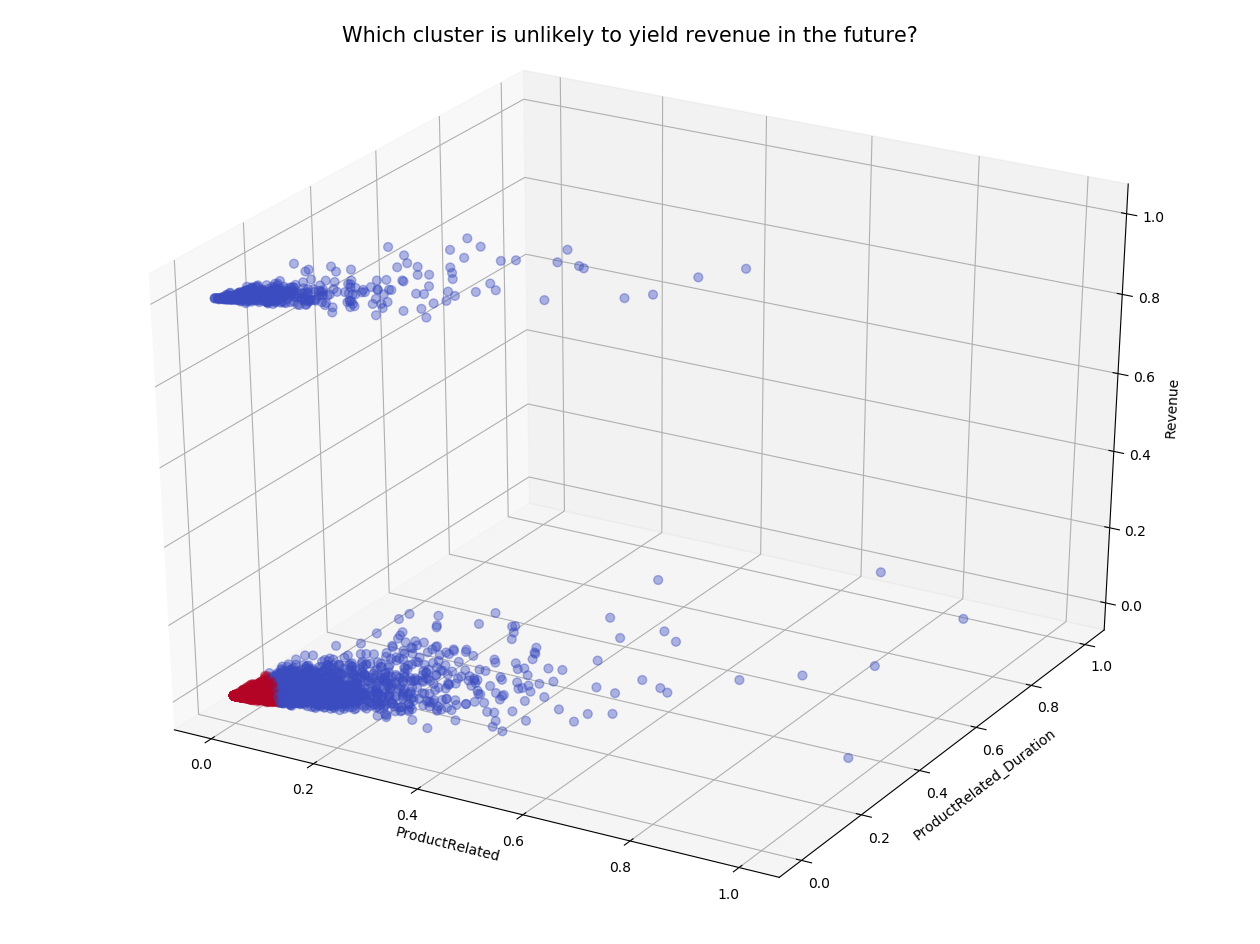

In [23]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
x = np.array(product_normal_df['NProductRelated'])
y = np.array(product_normal_df['NProductRelated_Duration'])
z = np.array(product_normal_df['NRevenue'])

ax.scatter(x,y,z, marker="o", c=product_normal_df["Cluster"] == 2, s=40, cmap="coolwarm", alpha = 0.4)

ax.set_xlabel('ProductRelated', fontsize = 10)
ax.set_ylabel('ProductRelated_Duration', fontsize = 10)
ax.set_zlabel('Revenue', fontsize = 10)

plt.title('Which cluster is unlikely to yield revenue in the future?', loc='center',pad=30, fontsize=15)
plt.show()

<font color=blue>To further improve the quality of products that are sold on the site, it is <b>important that we look at the products that are doing poorly</b>. What causes them to perform poorly? The cluster (Cluster 2) that is most unlikely to yield revenue tells us that these products may need revampment or there may be underlying issues that are causing them to perform poorly. Regardless, we should explore why this is happening. 

## [Back to top](#Contents) 

## e. Additional Analysis

<font color=green>Filter for cluster 2 dataframe

In [24]:
Cluster_2 = original_df['Cluster'] == 2

cluster_2_original_df = original_df[Cluster_2]
cluster_2_original_df.shape

(3256, 22)

In [25]:
cluster_2_original_df.tail()

,NProductRelated,NProductRelated_Duration,NRevenue,Cluster,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12320,0.027237,0.011364,0.0,2.0,0.0,0.0,0.0,0.0,8.0,143.583333,...,0.0,0.0,Nov,2,2,3,1,Returning_Visitor,False,0
12321,0.019455,0.000000,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.000000,...,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,False,0
12326,0.015564,0.036863,0.0,2.0,0.0,0.0,0.0,0.0,5.0,465.750000,...,0.0,0.0,Nov,3,2,1,8,Returning_Visitor,True,0
12327,0.019455,0.014583,0.0,2.0,0.0,0.0,0.0,0.0,6.0,184.250000,...,0.0,0.0,Nov,3,2,1,13,Returning_Visitor,True,0
12329,0.007782,0.001682,0.0,2.0,0.0,0.0,0.0,0.0,3.0,21.250000,...,0.0,0.0,Nov,3,2,1,2,New_Visitor,True,0


In [26]:
print(cluster_2_original_df.groupby('VisitorType').size())
print(cluster_2_original_df['PageValues'].mean())

VisitorType
New_Visitor           227
Other                  42
Returning_Visitor    2987
dtype: int64
0.12236167559029484


<font color=blue>A quick glance at the breakdown of visitor types show us that there is a <b>proportionately high no. of returning visitors</b>. Why so? 

In [27]:
interesting_df = cluster_2_original_df[cluster_2_original_df['VisitorType'] == 'Returning_Visitor']
interesting_df.head()

,NProductRelated,NProductRelated_Duration,NRevenue,Cluster,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0.003891,0.005065,0.0,2.0,0.0,0.0,0.0,0.0,2.0,64.000000,...,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
3,0.003891,0.000211,0.0,2.0,0.0,0.0,0.0,0.0,2.0,2.666667,...,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0.035019,0.049665,0.0,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,...,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0
5,0.070039,0.012206,0.0,2.0,0.0,0.0,0.0,0.0,19.0,154.216667,...,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,0


<font color=green> From the attribute description, we know that exit rates and bounce rates are factors that can tell us whether the pages are performing well. It is pecuilar how there are a high no. of returning visitors who visit the pages although they don't make any purchases. Why does that occur? Let's find out. 

In [28]:
exit_rates_graph = pd.DataFrame(interesting_df.groupby('ExitRates').size()).reset_index()
exit_rates_graph.columns = ['ExitRates', 'Value']

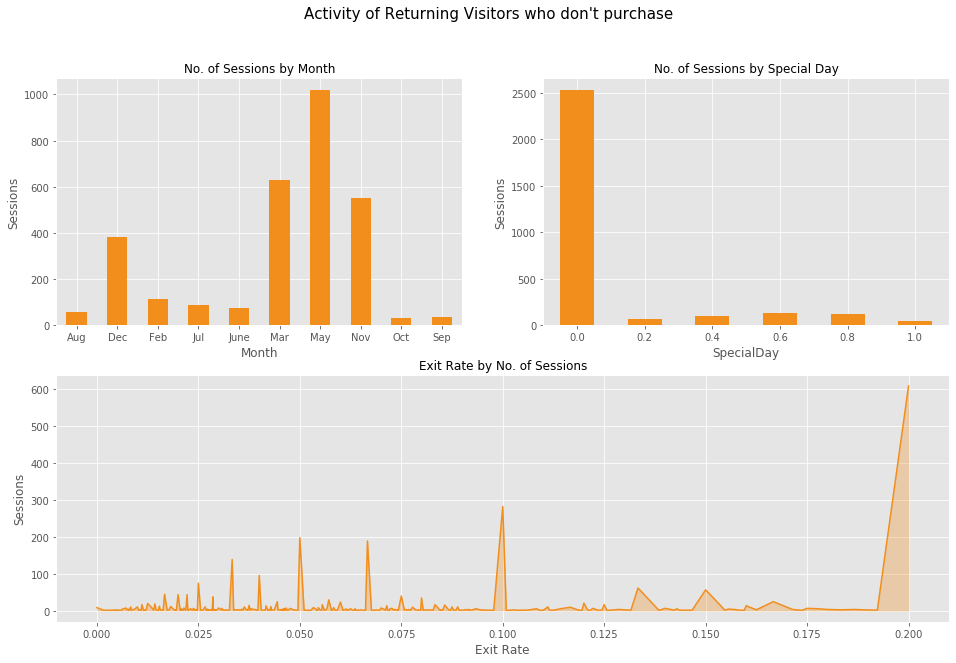

In [29]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')
fig_dimensions=(16, 10)
fig = plt.figure(figsize = fig_dimensions)
fig.suptitle('Activity of Returning Visitors who don\'t purchase', fontsize=15)

ax1 = fig.add_subplot(2,2,1)
ax1 = interesting_df.groupby('Month').size().plot(kind = 'bar', color="#f28e1c")
plt.xticks(rotation='horizontal')
plt.ylabel('Sessions')
plt.title('No. of Sessions by Month', fontsize=12);

ax2 = fig.add_subplot(2,2,2)
ax2 = interesting_df.groupby('SpecialDay').size().plot(kind = 'bar', color="#f28e1c")
plt.xticks(rotation='horizontal')
plt.title('No. of Sessions by Special Day', fontsize=12)
plt.ylabel('Sessions');

ax3 = fig.add_subplot(2,1,2)
ax3 = pd.DataFrame(interesting_df.groupby('ExitRates').size()).reset_index()
ax3.columns = ['ExitRates', 'Value']
plt.fill_between( exit_rates_graph['ExitRates'], exit_rates_graph['Value'], color="#f28e1c", alpha=0.3)
plt.plot(exit_rates_graph['ExitRates'], exit_rates_graph['Value'], color="#f28e1c")
plt.title('Exit Rate by No. of Sessions', fontsize=12)
plt.xlabel('Exit Rate')
plt.ylabel('Sessions');

<font color=blue>From the graphs above, we can tell that the exit rates is exceptionally high for these returning visitors. The no. of sessions by month and by special event do not show us any notable trends either. Special day events happen rarely. Thus, it is normal to observe a high no. of sessions for the value 0 (indicating a normal day). <b>A hypothesis would be that these returning visitors are checking to see if the prices of the products have changed and naturally, it wouldn't take them long to to check if the price of the product has changed.</b>

<font color=green>Having a high bounce rate and high exit rate could be a sign that a page is experiencing some issues that troubles the user. 

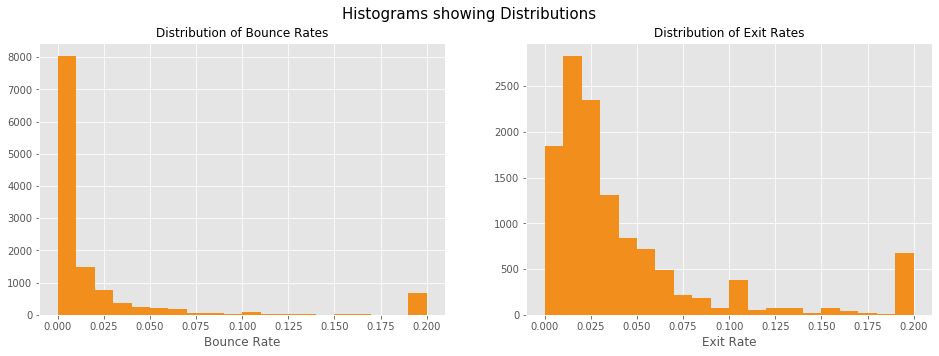

In [30]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')

# Set dimensions 
fig_dimensions=(16,5)
fig = plt.figure(figsize = fig_dimensions)
fig.suptitle('Histograms showing Distributions ', fontsize=15)

ax1 = fig.add_subplot(1,2,1)
plt.hist(shopper_df['BounceRates'], bins=20, color = '#f28e1c')
plt.title('Distribution of Bounce Rates', fontsize=12)
plt.xlabel('Bounce Rate')

ax2 = fig.add_subplot(1,2,2)
plt.hist(shopper_df['ExitRates'], bins=20, color = '#f28e1c')
plt.title('Distribution of Exit Rates', fontsize=12)
plt.xlabel('Exit Rate');

In [31]:
high_exit_rate = shopper_df['ExitRates'] == 0.2
high_bounce_rate = shopper_df['BounceRates'] == 0.2

hbhe_df = shopper_df[high_exit_rate & high_bounce_rate]
hbhe_df.shape

(667, 18)

In [32]:
print(hbhe_df.groupby('Administrative').size())
print(hbhe_df.groupby('Informational').size())
print(hbhe_df.groupby('ProductRelated').size())

Administrative
0.0    654
1.0     12
2.0      1
dtype: int64
Informational
0.0    661
1.0      6
dtype: int64
ProductRelated
0.0      15
1.0     503
2.0      92
3.0      33
4.0      11
5.0       6
6.0       2
7.0       1
9.0       1
10.0      1
11.0      1
13.0      1
dtype: int64


In [33]:
low_exit_rate = shopper_df['ExitRates'] == 0
low_bounce_rate = shopper_df['BounceRates'] == 0

lble_df = shopper_df[low_exit_rate & low_bounce_rate]
lble_df.shape

(76, 18)

In [34]:
print(lble_df.groupby('Administrative').size())
print(lble_df.groupby('Informational').size())
print(lble_df.groupby('ProductRelated').size())

Administrative
0.0    38
1.0    19
2.0     5
3.0     8
4.0     2
5.0     2
6.0     1
7.0     1
dtype: int64
Informational
0.0    69
1.0     3
2.0     2
6.0     2
dtype: int64
ProductRelated
1.0     5
2.0     5
3.0     8
4.0     5
5.0     3
6.0     3
7.0     8
8.0     3
9.0     1
10.0    4
11.0    4
13.0    5
14.0    2
15.0    2
16.0    1
17.0    4
19.0    2
20.0    1
21.0    2
24.0    1
27.0    1
29.0    1
32.0    1
44.0    1
47.0    1
66.0    1
73.0    1
dtype: int64


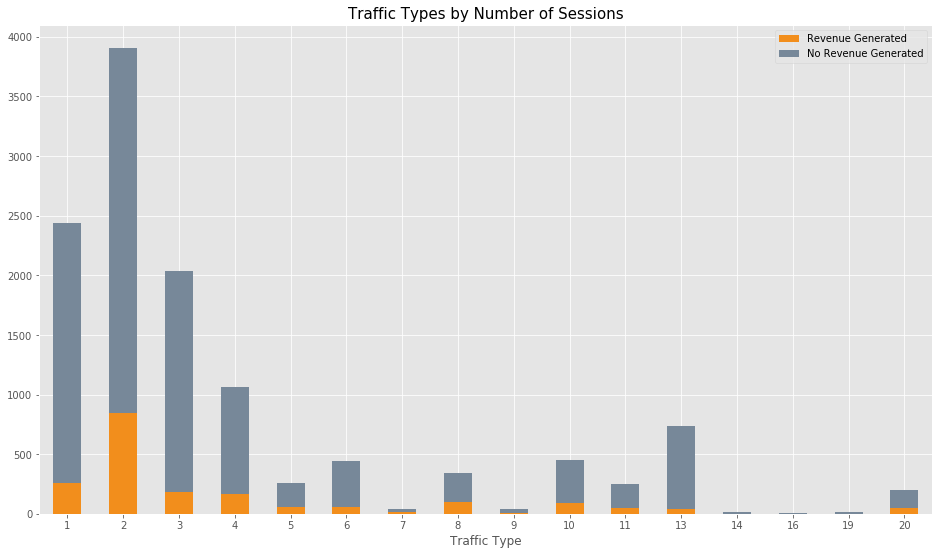

In [35]:
revenue_true = shopper_df['Revenue'] == 1
true_shopper_df = shopper_df[revenue_true] 
true_shopper_df = pd.DataFrame(true_shopper_df.groupby('TrafficType').size()).reset_index()
true_shopper_df.columns = ['TrafficType','Revenue Generated']
true_shopper_df

revenue_false = shopper_df['Revenue'] == 0
false_shopper_df = shopper_df[revenue_false] 
false_shopper_df = false_shopper_df.groupby('TrafficType').size().reset_index()
false_shopper_df.columns = ['TrafficType', 'No Revenue Generated']
false_shopper_df

traffic_df = true_shopper_df.merge(false_shopper_df, on='TrafficType', how='left')
traffic_df

traffic_df = traffic_df.plot.bar('TrafficType', color = ['#f28e1c', '#778899'], stacked = True)
plt.xticks(rotation='horizontal')
plt.title('Traffic Types by Number of Sessions', fontsize=15)
plt.xlabel('Traffic Type')
plt.gcf().set_size_inches(16, 9)
plt.show();

<font color=blue>From the stacked bar graph shown above, we can tell that the ecommerce website gets most of its traffic from type 1,2 and 3. With traffic type 2 yielding the highest revenue. Another interesting point is traffic type 13 which has a considerably high no. of sessions that do not generate revenue. 

<font color=green>Below is something I did to find out if k-means clustering can be applied to multiple variables at once and how it would affect the outcome of the target variable

In [36]:
numeric_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
PageValues                 0
SpecialDay                 0
Revenue                    0
dtype: int64

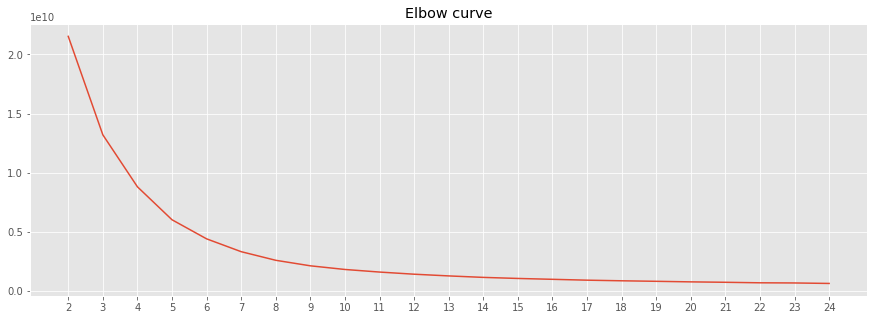

In [37]:
X = numeric_df # <<< Numerical DataFrame here
distorsions = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 25), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks(np.arange(2,25))
plt.show()

In [38]:
k = 6
model = KMeans(n_clusters=k,  # < Initialise Number Of Clusters here
               random_state=42) # default state of randomness

revenue_kmeans = model.fit(numeric_df) # < DataFrame of All Variables
print(revenue_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [39]:
numeric_df['Cluster'] = revenue_kmeans.labels_
numeric_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Revenue,Cluster
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0,2
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.0,0.0,0,2
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.0,0.0,0,2
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.0,0.0,0,2
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.0,0.0,0,2


<font color=green><b>Clustering Analysis</b>

In [40]:
cluster_size = pd.DataFrame(numeric_df.groupby(['Cluster']).size()).reset_index()
cluster_size.columns = ['Cluster', 'Size']
cluster_size

,Cluster,Size
0,0,3042
1,1,305
2,2,7832
3,3,66
4,4,2
5,5,1036


In [41]:

proportion = pd.DataFrame(numeric_df.groupby(['Revenue', 'Cluster']).size())

proportion = ((proportion / proportion.groupby(level=0).sum()) * 100).round(3).unstack(0)
proportion.columns = ['% revenue generated', '% of no revenue generated']
proportion.reset_index()
proportion.style.background_gradient(cmap='Greens')

,% revenue generated,% of no revenue generated
Cluster,,
0,23.133,33.648
1,1.976,5.241
2,67.046,45.912
3,0.386,1.363
4,0.019,nan
5,7.441,13.836


<font color=green>From these 6 clusters, we know that cluster 2 gives the highest amt of revenue generated

<font color=green>Filtering for cluster 2 

In [42]:
cluster0_df = numeric_df[numeric_df['Cluster'] == 0]
cluster0_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Revenue,Cluster
15,2.0,53.0,0.0,0.0,23.0,1668.285119,0.000000,0.0,0,0
26,4.0,64.6,0.0,0.0,32.0,1135.444444,0.000000,0.0,0,0
29,1.0,6.0,1.0,0.0,45.0,1582.750000,54.179764,0.4,0,0
35,0.0,0.0,0.0,0.0,52.0,2086.242857,0.000000,0.0,0,0
57,4.0,56.0,2.0,120.0,36.0,998.741667,19.447079,0.2,0,0


In [43]:
cluster0_df.groupby(['Revenue']).size()

Revenue
0    2400
1     642
dtype: int64

<font color=blue>From this we know that the k-means clustering algorithm is limited in its effectiveness when we use too many variables. Although cluster 2 gives the highest amount of revenue, it has a proportionately large no. of observations that give no revenue as well. 

## [Back to top](#Contents) 

# 5. Key Takeaways

1. Bounce rates are strongly correlated with exit rates.
2. PageValue is one of the most significant features that lead to revenue.
3. Returning visitors are checking to see if the prices of the products have changed. We can closely monitor the changes to these products. 
4. The website gets most of its traffic from type 1,2 and 3.
5. Traffic type 2 yields the highest revenue of all channels. 
6. Traffic type 13 has a considerably high no. of sessions that do not generate revenue. 

# 6. Attribute Information 

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## [Back to top](#Contents) 